# The Energy balance of the Earth

Learning objectives of this exercise:

- Get a basic idea of the physics behind the energy balance of a planet, including the Stefan-Boltzmann-law, albedo, the solar constant and emissivity
- Get familiar with Python and implement your first, simple radiation model
- Modify your code, such that it considers also greenhouse gases.

---

The naked planet model

We want to calculate the radiation model of a simplified planet without greenhouse gases, the so called naked planet model
∗
. The temperature of this planet is determined by balancing energy fluxes in and out of this planet. The energy that comes to the planet is provided by the sun. The planet itself radiates energy to an extent that depends on its temperature. The planet is characterised by a layer of water what serves as a buffer and stores energy until an equilibrium is reached and incoming and outgoing fluxes are balanced.

The incoming solar heat is determined by 
L
(
1
−
α
)
4
, with the solar constant 
L
 (which is not a constant!) and the albedo 
α
(between 0 and 1) of the planet. The factor 4 can be derived from the relation between the shadow of the planet with an area of 
π
r
2
 to the total surface of 
4
π
r
2
.

The outgoing heat depends on the temperature of the planet according to the Stefan-Boltzmann law, which is 
ϵ
⋅
σ
⋅
T
4
, with the emissivity of the planet (between 0 and 1, with 1 if the object is a black body that absorbs all electromagnetic radiation), the Stefan-Boltzmann constant 
σ
 = 5.67
⋅
 10
−
8
W
m
2
K
4
, and the current temperature of the planet 
T
.

Depending on the initial temperature of the planet, the incoming and out-going energy fluxes are not balanced and result in a warming (or cooling) of the planet. If we start with an initial temperature of 0K, the planet will absorb more energy than it emits, thus the total internal energy of the planet rises. The energy is stored by a layer of water with a predefined depth.

∗
An example of the naked planet model is also given in the Coursera Course on Global warming, if you would like to use additional materials.

**TODO:** Please import the libraries numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**TODO:** Define all the important variables: The solar constant, albedo of the planet, depth of the water layer, specific heat capacity of water, heat capacity of the water column (we canceled out the area from both, incoming and out-going energy fluxes, and thereby only consider a column of 1m
2
 (keep in mind the specific heat capacity of water is in [J/g K]), epsilon and sigma. Add all units (and any additional infos you need) with a command #

In [2]:
l = 1366   # W/m2
albedo = 0.3 # []
h = 4000   # depth of the ocean in meters
rho = 1000 # density of water [kg/m3]
capacity_water = 4.186 # heat capacity of water in [J/g K]
capacity = h * capacity_water * 10**3 * rho # J/m2 K # specific heat capacity of water times density of water
epsilon = 1. # []
sigma = 5.67E-8  # W/(m2 K4)

In [3]:
print(capacity)

16744000000.0


We want to track the temperature changes over time, starting with an inital temperature, e.g. t
0
 = 0K. After sufficient timesteps it will approach an equilibrium.

**TODO:** Create an array of time with np.arange(start, end, step), starting with 
t
0
 = 0, end with 1500 and timesteps of 20 years. You can choose also other timeperiods and -steps, but keep in mind that some combination may not work because they are numerically unstable

In [4]:
step = 20 # in years
time = np.arange(0, 1500, step)

The heat capacity of the planet is set by a layer of water that absorbs the incoming energy and thus changes its temperature. It depends on the specific heat capacity of water (4.186 [ J g
−
1
K
−
1
 ], the depth of the water layer in [m] and the density of water.

As energy is added to the planet, the heat content is changing as a function of time by the incoming and out-going fluxes:

d
(
h
e
a
t
_
c
o
n
t
e
n
t
)
d
t
 = 
L
(
1
−
α
)
4
 - 
σ
⋅
ϵ
⋅
T
4
.

If the first term is larger than the second, the heat content will increase. If the second term is larger, the heat content will decrease.

The heat content of a matter is related to the temperature by the heat capacity:

T(K) = 
heat_content
[
J
/
m
2
]
heat_capacity
[
J
/
m
2
K
]
.

Heat capacity is the amount of heat required to raise the temperature of an object by 1K.

We can solve this numerically:

heat_content(t+1) = heat_content(t) + 
d
(
h
e
a
t
_
c
o
n
t
e
n
t
)
d
t
 
⋅
 timestep

The incoming radiation will stay constant throughout the simulation. The outgoing radiation is governed by the temperature that is updated in each timestep.

**TODO:** We will start with a heat content and temperature of the planet of 0 J/m
2
K and 0K respectively. The variable heat_content will be overwritten in each step of a for-loop, while we want to keep track of the temperature by generating a list and appending the lastest termperature in each time step. Add the equation of the incoming and out-going energy fluxes to the for-loop. Keep in mind, that each timestep is in years and we need a factor to transfere years to seconds.

Hint: list[-1] calls the last item of a list

In [7]:
albedo = 0.3
heat_content = 0.
temp = [0]

heat_in = l*(1-albedo)/4 # add here the equation of incoming energy flux
heat_out = 0
heat_content =  capacity * temp[0]

for i in time:   
    heat_out = epsilon * sigma * pow(temp[-1], 4) # add here the equation of the out-going energy fluxes
    heat_content_per_dt = heat_in - heat_out
    heat_content = heat_content + (heat_content_per_dt \
                    * step * 3.14E7)
    #print(i, temp[-1])
    temp.append(heat_content/ capacity) 

**TODO:** Plot the calculated temperature curve over time with matplotlib.

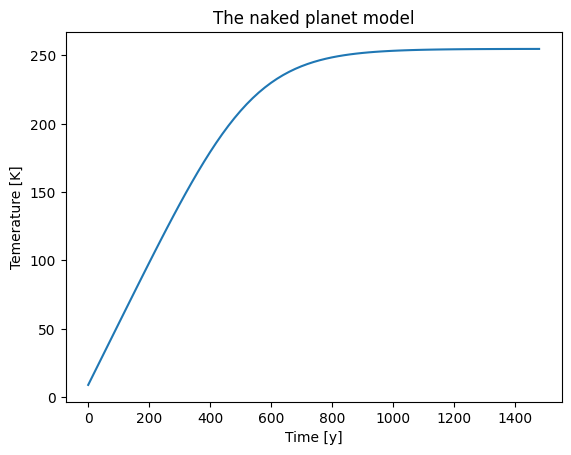

In [8]:
plt.xlabel('Time [y]')
plt.ylabel('Temerature [K]')

plt.title('The naked planet model')
plt.plot(time, temp[1:])

**TODO:** Imagine the albedo decreases by 0.03 or the initial temperature was 1000K. How does this changes the temperature? Add the new temperature curves to your plot.



### Albedo α = 0.03

In [9]:
albedo = 0.27
heat_content = 0.
temp_albedo_027 = [0]

heat_in = l * (1 - albedo)/ 4 # add here the equation of incoming energy flux
heat_out = 0
heat_content =  capacity * temp_albedo_027[0]

for i in time:   
    heat_out = epsilon * sigma * pow(temp_albedo_027[-1], 4) # add here the equation of the out-going energy fluxes
    heat_content_per_dt = heat_in - heat_out
    heat_content = heat_content + (heat_content_per_dt \
                    * step * 3.14E7)
    #print(i, temp[-1])
    temp_albedo_027.append(heat_content/ capacity) 

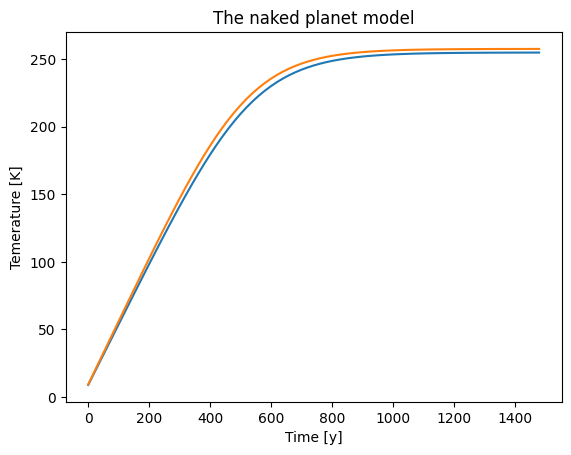

In [10]:
plt.xlabel('Time [y]')
plt.ylabel('Temerature [K]')

plt.title('The naked planet model')
plt.plot(time, temp[1:], time, temp_albedo_027[1:])

In [11]:
for i,j in zip(temp[1:],temp_albedo_027[1:]):
    print(i, j, j-i, j/i) 

8.965802675585284 9.350051361681796 0.3842486860965124 1.042857142857143
17.931591609479113 18.700086470141365 0.7684948606622513 1.0428570356384876
26.897174418675064 28.04987778117159 1.1527033624965242 1.0428559277102425
35.86186405592086 37.39861268372444 1.5367486278035756 1.0428518892773466
44.82414938684138 46.74450392925868 1.9203545424173 1.0428419628411518
53.781367232126726 56.08440202624786 2.3030347941211318 1.0428221689526962
62.72937847829473 65.413413091101 2.684034612806279 1.0427875212207784
71.66225299674217 74.72452850710383 3.0622755103616583 1.0427320574263954
80.5719708538239 84.00827640440805 3.4363055505841515 1.0426488953189244
89.44815053808964 93.25240927508136 3.804258736991727 1.0425303230319085
98.27781847915013 102.4416466822476 4.1638282030974665 1.0423679347744255
107.04523766848713 111.55749653399837 4.512258865511242 1.0421528221506262
115.73181625017337 120.5781820773055 4.846365827132132 1.0418758296910844
124.31611890791734 129.47870371389726 5.16

### Starting with a hot planet K = 1000K or below

In [12]:
albedo = 0.30
heat_content = 0.
temp_1000 = [600.]

heat_in = l * (1 - albedo)/ 4 # add here the equation of incoming energy flux
heat_out = 0
heat_content =  capacity * temp_1000[0]

for i in time:   
    heat_out = epsilon * sigma * pow(temp_1000[-1], 4) # add here the equation of the out-going energy fluxes
    heat_content_per_dt = heat_in - heat_out
    heat_content = heat_content + (heat_content_per_dt \
                    * step * 3.14E7)
    #print(i, temp[-1])
    temp_1000.append(heat_content/ capacity) 

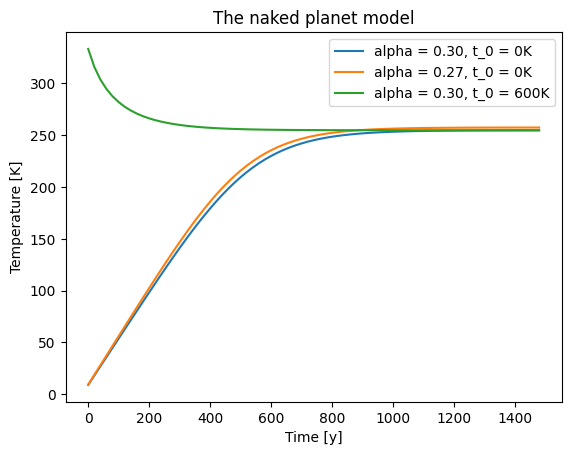

In [13]:
plt.xlabel('Time [y]')
plt.ylabel('Temperature [K]')

plt.title('The naked planet model')
plt.plot(time, temp[1:], time, temp_albedo_027[1:], time, temp_1000[1:])
plt.legend(['alpha = 0.30, t_0 = 0K', 'alpha = 0.27, t_0 = 0K', 'alpha = 0.30, t_0 = 600K'])

### Including GHGs
**Question:** What would be necessary to add the effect of greenhouse gases in the atmosphere to this model? How could it be implemented? How would this affect the temperature?

In [14]:
epsilon = 0.61
albedo = 0.3
heat_content = 0.
temp = [0.]

heat_in = l*(1-albedo)/4 # add here the equation of incoming energy flux
heat_out = 0
heat_content =  capacity * temp[0]

for i in time:   
    heat_out = epsilon * sigma * pow(temp[-1], 4) # add here the equation of the out-going energy fluxes
    heat_content_per_dt = heat_in - heat_out
    heat_content = heat_content + (heat_content_per_dt \
                    * step * 3.14E7)
    print(i, temp[-1])
    temp.append(heat_content/ capacity) 

0 0.0
20 8.965802675585284
40 17.93159696873878
60 26.897265525666235
80 35.862389238665294
100 44.82604620831763
120 53.78661125095104
140 62.74155692112077
160 71.68725781798163
180 80.61880097982494
200 89.52980641837327
220 98.41226325853049
240 107.2563884556689
260 116.05051654893761
280 124.78103021918469
300 133.43234235199222
320 141.98694061899332
340 150.42550502178597
360 158.72710714080083
380 166.86949680202733
400 174.82947743814017
420 182.5833656735388
440 190.10752392672404
460 197.37894766623378
480 204.37588216681957
500 211.07843811696182
520 217.46917215164845
540 223.5335980726082
560 229.2605975667353
580 234.64270555763824
600 239.67625432343223
620 244.36137114145032
640 248.70183516663587
660 252.70480917697085
680 256.38046960263966
700 259.74156317025626
720 262.802920298324
740 265.58095429692577
760 268.0931720292514
780 270.3577167583126
800 272.3929582396149
820 274.21713944780015
840 275.84808418751356
860 277.30296557877875
880 278.5981321770849
900 2

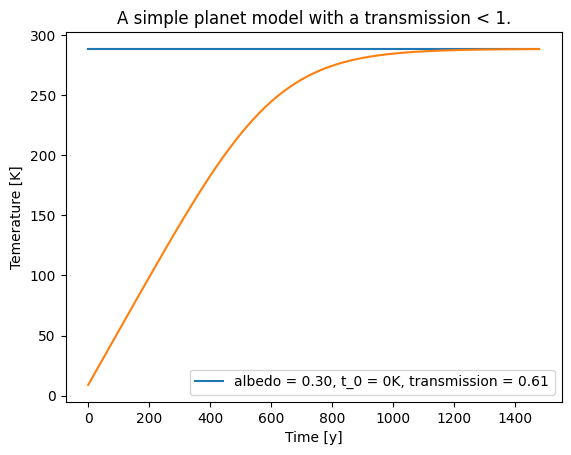

In [15]:
plt.xlabel('Time [y]')
plt.ylabel('Temerature [K]')

plt.title('A simple planet model with a transmission < 1.')
plt.plot(time, [288.3]*len(temp[1:]), time, temp[1:])
plt.legend(['albedo = 0.30, t_0 = 0K, transmission = 0.61'])